## Mid sem presentation (Hybrids)

### Load Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

### Read Data

In [2]:
df = pd.read_csv("creditcard.csv")

### Glimse of data

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### Credit card Fraud- data unbalance

/home/abhigyan/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Normal'), Text(1, 0, 'Fraud')]

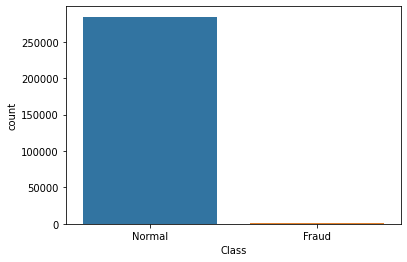

In [6]:
graph = sns.countplot(df["Class"],data=df)
graph.set_xticklabels(["Normal","Fraud"])

### check for missing values

<AxesSubplot:>

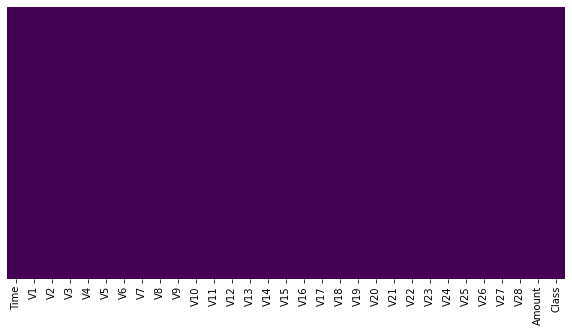

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis',cbar=False)

In [8]:
target = df["Class"]

In [9]:
target

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [10]:
df= df.drop(["Class"],axis=1)

In [11]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


## splitting data in train and test sets

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df,target,test_size=0.3,random_state=42)

In [13]:
x_test.shape

(85443, 30)

In [14]:
x_train.shape

(199364, 30)

In [15]:
y_test.value_counts()

0    85307
1      136
Name: Class, dtype: int64

## Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
from sklearn.model_selection import cross_val_score

In [17]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

kfold = KFold(n_splits=10, random_state=42, shuffle=True) 

results = cross_validate(estimator=rf,
                                          X=df,
                                          y=target,
                                          cv=kfold,
                                          scoring=scoring)

In [18]:
results

{'fit_time': array([330.25636244, 367.71210575, 440.75258803, 464.06165338,
        390.93591142, 329.80750632, 359.55124593, 437.47896624,
        406.31043696, 388.03065801]),
 'score_time': array([1.28498793, 0.48967004, 0.78859878, 0.94895172, 0.53791761,
        0.52073288, 0.93977189, 1.34330654, 0.97909045, 0.87682319]),
 'test_accuracy': array([0.99957867, 0.99954356, 0.99975422, 0.99947333, 0.99950844,
        0.99947333, 0.99964889, 0.99950843, 0.99947331, 0.99968399]),
 'test_precision': array([0.97222222, 0.95348837, 0.8974359 , 0.93478261, 1.        ,
        0.93103448, 0.975     , 0.95348837, 0.87755102, 1.        ]),
 'test_recall': array([0.76086957, 0.78846154, 0.92105263, 0.78181818, 0.74545455,
        0.675     , 0.8125    , 0.77358491, 0.82692308, 0.83018868]),
 'test_f1_score': array([0.85365854, 0.86315789, 0.90909091, 0.85148515, 0.85416667,
        0.7826087 , 0.88636364, 0.85416667, 0.85148515, 0.90721649])}

In [19]:
precision = np.mean(results['test_precision'])
precision
np.mean(results['test_recall'])

0.7915853124359342

In [20]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [21]:
y_pred_rf = rf.predict(x_test)

## AdaBoost

In [22]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators = 100, random_state = 42,algorithm='SAMME.R',
                         learning_rate=0.8,)
ada.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.8, n_estimators=100, random_state=42)

In [23]:
y_pred_ada = ada.predict(x_test)

## Gradient Boosting

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [26]:
y_pred_gb = gb.predict(x_test)

## XG Boost

In [27]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

/home/abhigyan/.local/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [28]:
xgb.fit(x_train,y_train)

/home/abhigyan/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/abhigyan/.local/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:04:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
y_pred_xgb = xgb.predict(x_test)

## Adaboost and Random Forest Hybrid

In [70]:
y_pred = y_pred_ada & y_pred_rf
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9995435553526912
[[85305     2]
 [   37    99]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.98      0.73      0.84       136

    accuracy                           1.00     85443
   macro avg       0.99      0.86      0.92     85443
weighted avg       1.00      1.00      1.00     85443



## Adaboost and Gradient Boost Hybrid

In [71]:
y_pred = y_pred_ada | y_pred_gb
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9994382219725431
[[85288    19]
 [   29   107]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.85      0.79      0.82       136

    accuracy                           1.00     85443
   macro avg       0.92      0.89      0.91     85443
weighted avg       1.00      1.00      1.00     85443



## Adaboost and XGBoost Hybrid 

In [72]:
y_pred = y_pred_ada & y_pred_xgb
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9995669627705019
[[85305     2]
 [   35   101]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.98      0.74      0.85       136

    accuracy                           1.00     85443
   macro avg       0.99      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443



## GradientBoost and Random Forest Hybrid

In [73]:
y_pred = y_pred_gb | y_pred_rf
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9996488887328394
[[85300     7]
 [   23   113]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.94      0.83      0.88       136

    accuracy                           1.00     85443
   macro avg       0.97      0.92      0.94     85443
weighted avg       1.00      1.00      1.00     85443



## GB and XGB Hybrid

In [74]:
y_pred = y_pred_gb | y_pred_xgb
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9996605924417448
[[85300     7]
 [   22   114]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.94      0.84      0.89       136

    accuracy                           1.00     85443
   macro avg       0.97      0.92      0.94     85443
weighted avg       1.00      1.00      1.00     85443



## Under Sampling

In [35]:
from imblearn.under_sampling import NearMiss
from collections import Counter

In [36]:
us = NearMiss(0.8)
x_train_us,y_train_us = us.fit_resample(x_train,y_train)
print("The samples before fit {}".format(Counter(y_train)))
print("The samples before fit {}".format(Counter(y_train_us)))

/home/abhigyan/.local/lib/python3.8/site-packages/imblearn/utils/_validation.py:586: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


The samples before fit Counter({0: 199008, 1: 356})
The samples before fit Counter({0: 445, 1: 356})


## Rf with US

In [37]:
rf.fit(x_train_us,y_train_us)
y_pred_rf_us = rf.predict(x_test)

## Ada with US

In [38]:
ada.fit(x_train_us,y_train_us)
y_pred_ada_us = ada.predict(x_test)

## GB with US

In [39]:
gb.fit(x_train_us,y_train_us)
y_pred_gb_us = gb.predict(x_test)

## XGB with US

In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
xgb.fit(x_train_us,y_train_us)
y_pred_xgb_us = xgb.predict(x_test)

/home/abhigyan/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/abhigyan/.local/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:06:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## RF and Ada Hybrid US

In [75]:
y_pred = y_pred_ada_us | y_pred_rf_us
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.5110658567700104
[[43535 41772]
 [    4   132]]
              precision    recall  f1-score   support

           0       1.00      0.51      0.68     85307
           1       0.00      0.97      0.01       136

    accuracy                           0.51     85443
   macro avg       0.50      0.74      0.34     85443
weighted avg       1.00      0.51      0.67     85443



## RF and GB Hybrid US

In [76]:
y_pred = y_pred_gb_us | y_pred_rf_us
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.5549547651650808
[[47285 38022]
 [    4   132]]
              precision    recall  f1-score   support

           0       1.00      0.55      0.71     85307
           1       0.00      0.97      0.01       136

    accuracy                           0.55     85443
   macro avg       0.50      0.76      0.36     85443
weighted avg       1.00      0.55      0.71     85443



## RF and XGB Hybrid US

In [77]:
y_pred = y_pred_xgb_us | y_pred_rf_us
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.5940919677445783
[[50630 34677]
 [    5   131]]
              precision    recall  f1-score   support

           0       1.00      0.59      0.74     85307
           1       0.00      0.96      0.01       136

    accuracy                           0.59     85443
   macro avg       0.50      0.78      0.38     85443
weighted avg       1.00      0.59      0.74     85443



## Ada and GB Hybrid US

In [78]:
y_pred = y_pred_ada_us | y_pred_gb_us
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.5043596315672436
[[42962 42345]
 [    4   132]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67     85307
           1       0.00      0.97      0.01       136

    accuracy                           0.50     85443
   macro avg       0.50      0.74      0.34     85443
weighted avg       1.00      0.50      0.67     85443



## Ada and XGB Hybrid US

In [79]:
y_pred = y_pred_ada_us | y_pred_xgb_us
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.49779385087134115
[[42401 42906]
 [    4   132]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.66     85307
           1       0.00      0.97      0.01       136

    accuracy                           0.50     85443
   macro avg       0.50      0.73      0.34     85443
weighted avg       1.00      0.50      0.66     85443



## GB and XGB Hybrid US

In [80]:
y_pred = y_pred_gb_us | y_pred_xgb_us
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.5331975703100312
[[45426 39881]
 [    4   132]]
              precision    recall  f1-score   support

           0       1.00      0.53      0.69     85307
           1       0.00      0.97      0.01       136

    accuracy                           0.53     85443
   macro avg       0.50      0.75      0.35     85443
weighted avg       1.00      0.53      0.69     85443



## Over Sampling

In [46]:
from imblearn.over_sampling import RandomOverSampler

In [47]:
os = RandomOverSampler(0.75)
x_train_os,y_train_os = os.fit_resample(x_train,y_train)
print("The samples before fit {}".format(Counter(y_train)))
print("The samples before fit {}".format(Counter(y_train_os)))

/home/abhigyan/.local/lib/python3.8/site-packages/imblearn/utils/_validation.py:586: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


The samples before fit Counter({0: 199008, 1: 356})
The samples before fit Counter({0: 199008, 1: 149256})


## Rf with OS

In [48]:
rf.fit(x_train_os,y_train_os)
y_pred_rf_os = rf.predict(x_test)

## Ada with OS

In [49]:
ada.fit(x_train_os,y_train_os)
y_pred_ada_os = ada.predict(x_test)

## Gb with OS

In [50]:
gb.fit(x_train_os,y_train_os)
y_pred_gb_os = gb.predict(x_test)

## XGB with OS

In [51]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
xgb.fit(x_train_os,y_train_os)
y_pred_xgb_os = xgb.predict(x_test)

/home/abhigyan/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/abhigyan/.local/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:22:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## Adaboost and RF Hybrid OS

In [81]:
y_pred = y_pred_ada_os & y_pred_rf_os
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9996371850239341
[[85302     5]
 [   26   110]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.96      0.81      0.88       136

    accuracy                           1.00     85443
   macro avg       0.98      0.90      0.94     85443
weighted avg       1.00      1.00      1.00     85443



## Adaboost and GB Hybrid OS

In [82]:
y_pred = y_pred_ada_os & y_pred_gb_os
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9966644429619747
[[85032   275]
 [   10   126]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.31      0.93      0.47       136

    accuracy                           1.00     85443
   macro avg       0.66      0.96      0.73     85443
weighted avg       1.00      1.00      1.00     85443



## Adaboost and XGB Hybrid OS

In [83]:
y_pred = y_pred_ada_os & y_pred_xgb_os
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9996254813150287
[[85296    11]
 [   21   115]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.91      0.85      0.88       136

    accuracy                           1.00     85443
   macro avg       0.96      0.92      0.94     85443
weighted avg       1.00      1.00      1.00     85443



## GB and RF Hybrid OS

In [84]:
y_pred = y_pred_gb_os & y_pred_rf_os
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9996254813150287
[[85301     6]
 [   26   110]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.95      0.81      0.87       136

    accuracy                           1.00     85443
   macro avg       0.97      0.90      0.94     85443
weighted avg       1.00      1.00      1.00     85443



## GB and XGB Hybrid OS

In [85]:
y_pred = y_pred_gb_os & y_pred_xgb_os
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9996137776061234
[[85295    12]
 [   21   115]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.91      0.85      0.87       136

    accuracy                           1.00     85443
   macro avg       0.95      0.92      0.94     85443
weighted avg       1.00      1.00      1.00     85443



## SMOTETomek

In [57]:
from imblearn.combine import SMOTETomek

In [58]:
sm = SMOTETomek()
x_train_sm,y_train_sm = sm.fit_resample(x_train,y_train)
print("The samples before fit {}".format(Counter(y_train)))
print("The samples before fit {}".format(Counter(y_train_sm)))

The samples before fit Counter({0: 199008, 1: 356})
The samples before fit Counter({0: 198380, 1: 198380})


In [59]:
Counter(y_test)

Counter({1: 136, 0: 85307})

## Rf with SMOTETomek

In [60]:
rf.fit(x_train_sm,y_train_sm)
y_pred_rf_sm = rf.predict(x_test)

## Ada with SMOTETomek

In [61]:
ada.fit(x_train_sm,y_train_sm)
y_pred_ada_sm = ada.predict(x_test)

## Gb with SMOTETomek

In [62]:
gb.fit(x_train_sm,y_train_sm)
y_pred_gb_sm = gb.predict(x_test)

## XGB with SMOTETomek

In [63]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
xgb.fit(x_train_sm,y_train_sm)
y_pred_xgb_sm = xgb.predict(x_test)

/home/abhigyan/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/abhigyan/.local/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20:00:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## Adaboost and Rf Hybrid SMOTETomek

In [86]:
y_pred = y_pred_ada_sm & y_pred_rf_sm
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9995084442259752
[[85283    24]
 [   18   118]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.83      0.87      0.85       136

    accuracy                           1.00     85443
   macro avg       0.92      0.93      0.92     85443
weighted avg       1.00      1.00      1.00     85443



## Adaboost and GB Hybrid SMOTETomek

In [87]:
y_pred = y_pred_ada_sm & y_pred_gb_sm
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.996044146389991
[[84982   325]
 [   13   123]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.27      0.90      0.42       136

    accuracy                           1.00     85443
   macro avg       0.64      0.95      0.71     85443
weighted avg       1.00      1.00      1.00     85443



## Adaboost and XGB Hybrid SMOTETomek

In [88]:
y_pred = y_pred_ada_sm & y_pred_xgb_sm
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9994499256814484
[[85277    30]
 [   17   119]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.80      0.88      0.84       136

    accuracy                           1.00     85443
   macro avg       0.90      0.94      0.92     85443
weighted avg       1.00      1.00      1.00     85443



## GB and Rf Hybrid SMOTETomek

In [89]:
y_pred = y_pred_gb_sm & y_pred_rf_sm
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9994967405170698
[[85282    25]
 [   18   118]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.83      0.87      0.85       136

    accuracy                           1.00     85443
   macro avg       0.91      0.93      0.92     85443
weighted avg       1.00      1.00      1.00     85443



## GB and XGB Hybrid SMOTETomek

In [90]:
y_pred = y_pred_gb_sm & y_pred_xgb_sm
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9994265182636377
[[85275    32]
 [   17   119]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.79      0.88      0.83       136

    accuracy                           1.00     85443
   macro avg       0.89      0.94      0.91     85443
weighted avg       1.00      1.00      1.00     85443

